In [1]:
using Pkg
Pkg.add(["Combinatorics", "Distributions", "Plots"])

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/PycharmProjects/machine_learning/Project.toml`
  No Changes to `~/PycharmProjects/machine_learning/Manifest.toml`


In [2]:
using Combinatorics
import Distributions: Normal, rand
using Random
using Plots

In [3]:

function polynomial_features(X, degree)

    n_samples, n_features = 1, 1
    try
        n_samples, n_features = size(X)
    catch BoundsError
        n_samples = length(X)
    end

    combs = [with_replacement_combinations(1:n_features, i) for i in 0:degree+1]

    combinations = []
    for sublist in combs
        for j in sublist
             push!(combinations, j)
        end
    end
    n_output_features = length(combinations)
    X_new = zeros(n_samples, n_output_features)

    for (i, index_combs) in enumerate(combinations)
        X_new[:, i] = prod(X[:, index_combs], dims=2)
    end

    return X_new

end

polynomial_features (generic function with 1 method)

In [4]:
n = 1000
x = LinRange(1.5, 5, n)
yf = sin.(x .* x)
y = yf .+ 0.5 .* randn(n)

1000-element Vector{Float64}:
  0.8780557598023615
  1.1503423225660543
  1.3442770084793456
  1.3559134954515701
  1.9147792801910841
  1.528783267330544
  0.6025547183582314
  0.1762835296579125
 -0.4756255322488161
  0.4695603470840997
  0.9643982953819765
  1.0560778905053212
  0.9147273604133463
  ⋮
 -0.4652229677935965
 -0.09345014232836413
 -0.32226737819890294
 -0.4007507460311703
 -0.09714194717672087
  0.05971509849842199
 -0.402116106574188
  0.5529216249332753
 -0.3111677934117426
 -1.4977580689057315
 -0.6200108984663982
 -0.33054437527978064

In [5]:
abstract type AbstractKernel end
struct Epanechnikov <: AbstractKernel end

"""
    epanechnikov(t)

Compute the Epanechnikov kernel.
"""
function (::Epanechnikov)(t)

    kernel = zero(t)
    idx = findall(abs.(t) .<= 1)
    kernel[idx] = 0.75 .* (1 .- t[idx].^2)
    return kernel

end

kernel = Epanechnikov()

Epanechnikov()

In [6]:
function predict( x, y, degree, width)
    xnew = polynomial_features(x, degree)
    ypred = Float64[]
    for xp in x
        w = kernel(abs.(x .- xp) ./ width)
        poly = polynomial_features([xp], degree)
        
        beta = ( xnew .* w) \ ( y .* w)
        
        push!(ypred, poly * beta...)
    end
    ypred
end

predict (generic function with 1 method)

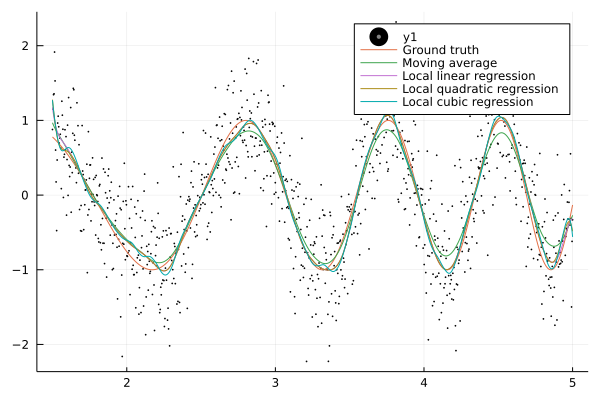

In [7]:
width = 0.2
y0 = predict( x, y, 0, width)
y1 = predict( x, y, 1, width)
y2 = predict( x, y, 2, width)
y3 = predict( x, y, 3, width)
scatter(x, y, ms=0.7, color="gray")
plot!(x, yf, label="Ground truth")
plot!(x, y0, label="Moving average")
plot!(x, y1, label="Local linear regression")
plot!(x, y2, label="Local quadratic regression")
plot!(x, y3, label="Local cubic regression")

# Another test with one-dimensional data 

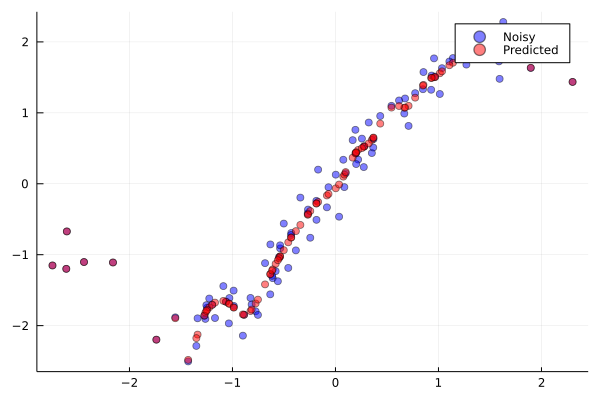

In [8]:
X = randn(100) # Generate a normally-distributed random number of type T with mean 0 and standard deviation 1
Y = 2 * sin.(X) + rand(Normal(0, 0.25), 100)
Y_true = 2 * sin.(X)

# Fit local polynomials
kernel = Epanechnikov()
degree =2
width = 0.3

Y_pred = predict( X, Y, degree, width)

# Plot the results
scatter(X, Y, alpha=0.5, color="blue", label="Noisy")
scatter!(X, Y_pred, alpha=0.5, color="red", label="Predicted")



Estimate the curve on a regular grid.

In [9]:
function predict( xpred, x, y, degree, width)
    xnew = polynomial_features(x, degree)
    ypred = Float64[]
    for xp in xpred
        w = kernel(abs.(x .- xp) ./ width)
        poly = polynomial_features([xp], degree)
        beta = ( xnew .* w) \ ( y .* w)  
        push!(ypred, poly * beta...)
    end
    ypred
end

predict (generic function with 2 methods)

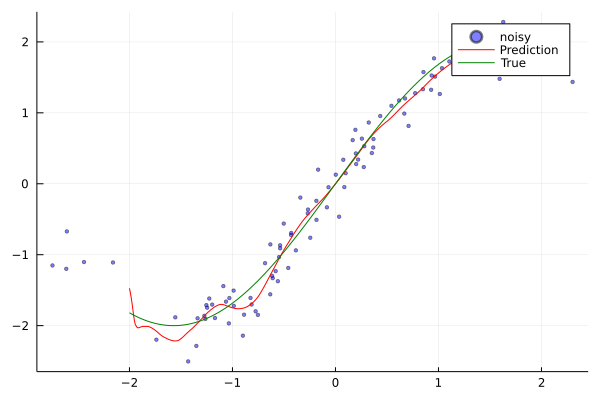

In [10]:
width, degree = 0.5, 1
X_pred =  LinRange(-2, 2, 500) |> collect
Y_pred = predict( X_pred,  X, Y, degree, width)
Y_true = 2 * sin.(X_pred)
scatter(X, Y, ms=2, alpha=0.5, color="blue", label="noisy")
plot!(X_pred, Y_pred, color="red", label="Prediction")
plot!(X_pred, Y_true, color="green", label="True")